In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('D:\\dsa\\satisfaction.xlsx')
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
df.shape

(129880, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [6]:
# Preprocessing

In [7]:
df.isna().sum()

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [8]:
df['Arrival Delay in Minutes'].mode()[0]

0.0

In [9]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mode()[0],inplace=True)

In [10]:
df.isna().sum()

id                                   0
satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [11]:
#Dealing with outliers

<AxesSubplot:>

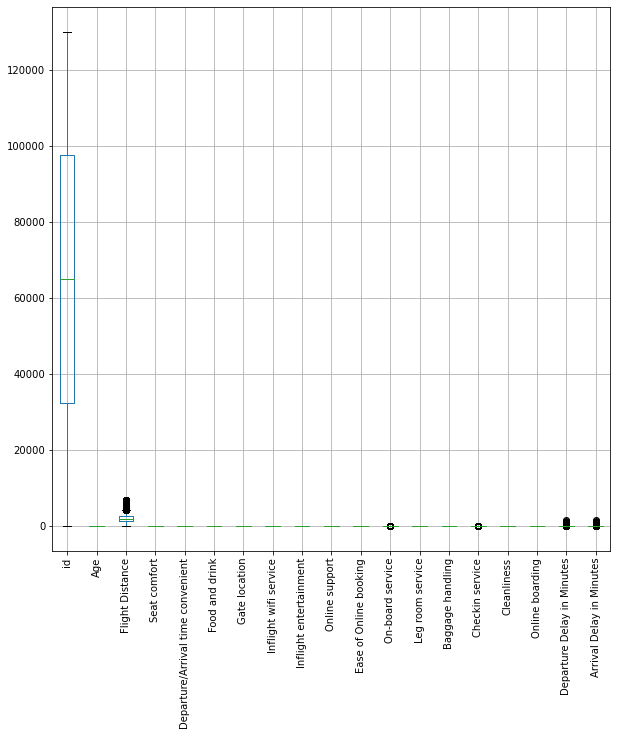

In [12]:
plt.figure(figsize=(10,10))
df.boxplot(rot=90)

In [13]:
# Outliers are in .Flight Distance .Departure Delay in Minutes .Arrival Delay in Minutes

In [36]:
def outliers(x):
    q1=np.percentile(x,25)
    q3=np.percentile(x,75)
    iqr=q3-q1
    floor=q1-1.5*iqr
    ceiling=q3+1.5*iqr
    return floor,ceiling
    

In [37]:
up_bound,l_bound=outliers(df['Departure Delay in Minutes'])
print('Outliers lowerbound=',l_bound)
print('Outliers uppernound=',up_bound)

Outliers lowerbound= 0.0
Outliers uppernound= 0.0


In [31]:
med=np.median(df['Departure Delay in Minutes'])
for i in df['Departure Delay in Minutes']:
    if ((i>up_bound) or (i<l_bound)):
        df['Departure Delay in Minutes']=df['Departure Delay in Minutes'].replace(i,med)

In [17]:
up_bound,l_bound=outliers(df['Arrival Delay in Minutes'])
print('Outliers lowerbound=',l_bound)
print('Outliers uppernound=',up_bound)

Outliers lowerbound= 32.5
Outliers uppernound= -19.5


In [32]:
med=np.median(df['Arrival Delay in Minutes'])
for i in df['Arrival Delay in Minutes']:
    if ((i>up_bound) or (i<l_bound)):
        df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].replace(i,med)

<AxesSubplot:>

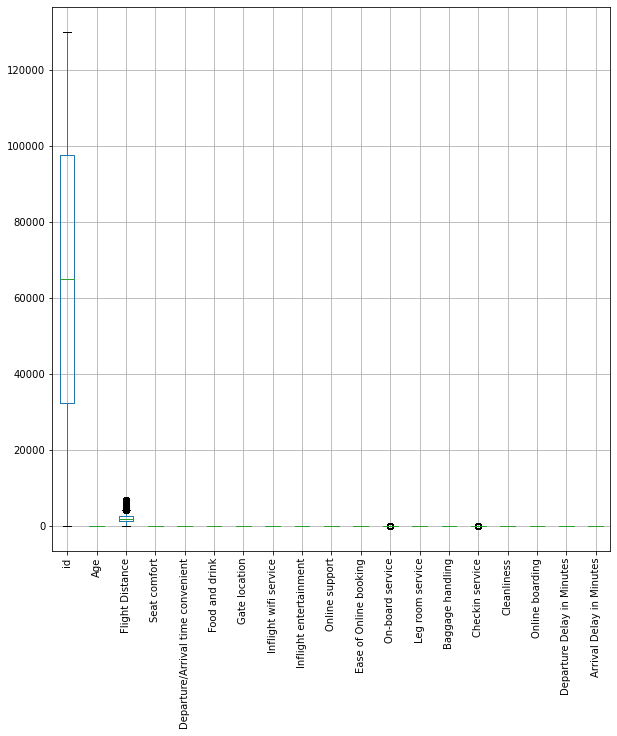

In [33]:
plt.figure(figsize=(10,10))
df.boxplot(rot=90)

In [20]:
#  Encoding

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [22]:
df['satisfaction_v2'].value_counts()

satisfied                  71087
neutral or dissatisfied    58793
Name: satisfaction_v2, dtype: int64

In [23]:
cat_data=['satisfaction_v2','Gender','Customer Type','Type of Travel','Class']

In [38]:
for i in cat_data:
    print(df[i].value_counts())

satisfied                  71087
neutral or dissatisfied    58793
Name: satisfaction_v2, dtype: int64
Female    65899
Male      63981
Name: Gender, dtype: int64
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64


In [39]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder={}

for i in cat_data:
    label_encoder[i] = LabelEncoder()
    df[i] = label_encoder[i].fit_transform(df[i]) 

In [40]:
df.head(10)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,1,0,0,65,1,1,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,1,1,0,47,1,0,2464,0,0,...,2,3,4,4,4,2,3,2,0,0.0
2,103199,1,0,0,15,1,1,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,1,0,0,60,1,1,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,1,0,0,70,1,1,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,100744,1,1,0,30,1,1,1894,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,32838,1,0,0,66,1,1,227,0,0,...,5,5,5,0,5,5,5,3,0,0.0
7,32864,1,1,0,10,1,1,1812,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,53786,1,0,0,56,1,0,73,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,7243,1,1,0,22,1,1,1556,0,0,...,2,2,2,4,5,3,4,2,0,0.0


In [41]:
#Feature Reduction

In [42]:
df.columns

Index(['id', 'satisfaction_v2', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

<AxesSubplot:>

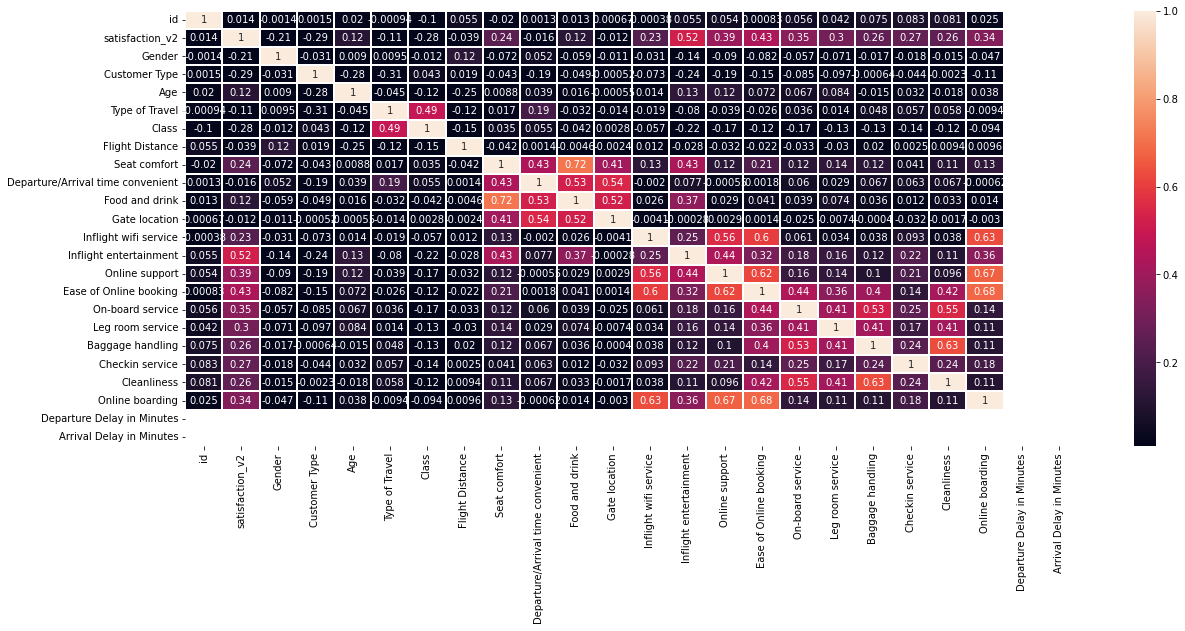

In [43]:
corrmatrix=df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.01,vmax=1,annot=True,linewidth=0.2)

In [44]:
# Correlation between Departure Delay in minutes and Arrival Delay in minutes is so high then we can drop one of them also we can drop column id

In [45]:
x=df.drop(['id','Arrival Delay in Minutes','satisfaction_v2'],axis=1)

In [46]:
y=df['satisfaction_v2']

In [47]:
x.shape

(129880, 21)

In [48]:
#Features Engineering

In [49]:
x.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes'],
      dtype='object')

In [50]:
x['Amenities']=df[['Food and drink','Seat comfort','Inflight entertainment','Cleanliness']].sum(axis=1)

In [51]:
x['Services']=df[['On-board service','Leg room service','Baggage handling','Checkin service','Inflight wifi service']].sum(axis=1)

In [52]:
x=x.drop(['Food and drink','Seat comfort','Inflight entertainment','Cleanliness','On-board service','Leg room service','Baggage handling','Checkin service','Inflight wifi service'],axis=1)


In [53]:
x.shape

(129880, 14)

In [54]:
x.head(10) 

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Gate location,Online support,Ease of Online booking,Online boarding,Departure Delay in Minutes,Amenities,Services
0,0,0,65,1,1,265,0,2,2,3,2,0,7,13
1,1,0,47,1,0,2464,0,3,2,3,2,0,5,14
2,0,0,15,1,1,2138,0,3,2,2,2,0,4,16
3,0,0,60,1,1,623,0,3,3,1,3,0,5,9
4,0,0,70,1,1,354,0,3,4,2,5,0,5,12
5,1,0,30,1,1,1894,0,3,2,2,2,0,4,21
6,0,0,66,1,1,227,0,3,5,5,3,0,10,17
7,1,0,10,1,1,1812,0,3,2,2,2,0,4,17
8,0,0,56,1,0,73,0,3,5,4,4,0,7,15
9,1,0,22,1,1,1556,0,3,2,2,2,0,4,16


In [55]:
#splitting the data

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [57]:
x_train.shape

(97410, 14)

In [58]:
y_train.shape

(97410,)

In [59]:
x_test.shape

(32470, 14)

In [60]:
y_test.shape

(32470,)

In [ ]:
#Scaling
from sklearn.preprocessing import  StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
y_test=scale.fit_transform(x_test)

In [ ]:
#EDA

In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.countplot(x=df['satisfaction_v2'])

plt.subplot(1,2,2)
count_test=df['satisfaction_v2'].value_counts()
labels=df['satisfaction_v2'].value_counts().index
plt.pie(count_test,labels=labels,shadow=True,explode=(0,0.08),autopct='%1.1f%%')
plt.legend(labels)
plt.title('satisfaction')
plt.show()

In [ ]:
df_sat=df.loc[df['satisfaction_v2']==0]
df_notsat=df.loc[df['satisfaction_v2']==1]

In [ ]:
plt.plot(df_sat['Online boarding'],np.zeros_like(df_sat['Online boarding']))
plt.plot(df_notsat['Online boarding'],np.zeros_like(df_notsat['Online boarding']))
plt.xlabel('Online boarding')
plt.show()

In [ ]:
for i in df.columns:
    if len(df[i].unique())<=6 and i !='satisfaction_v2':
        plt.figure (figsize=(8,5))
        plt.subplot(1,2,1)
        sns.countplot(x=df[i],data=df)
        
        plt.subplot(1,2,2)
        sns.countplot(x=df[i],hue='satisfaction_v2',data=df)
        plt.show()

In [ ]:
sns.displot(data=df,x='Age',kind='kde')

In [ ]:
# The Most age range from 25 to 35 and from 40 to 60 This means to focus more on the needs of them

In [ ]:
sns.histplot(x='Flight Distance',hue='satisfaction_v2',data=df,element='poly')

In [ ]:
df.columns

In [ ]:
g_data=df.groupby('Class')['Departure/Arrival time convenient','Food and drink','Gate location',
       'Inflight wifi service', 'Inflight entertainment',
       'Ease of Online booking', 'Leg room service', 'Checkin service', 'Cleanliness'].agg(['mean'])

In [ ]:
g_data.T.plot(kind='bar')

In [ ]:
g_data1=df.groupby('Type of Travel')['Departure/Arrival time convenient','Food and drink','Gate location',
       'Inflight wifi service', 'Inflight entertainment',
       'Ease of Online booking', 'Leg room service', 'Checkin service', 'Cleanliness'].agg(['mean'])

In [ ]:
g_data1.T.plot(kind='bar')

In [ ]:
g_data2=df.groupby('Customer Type')['Departure/Arrival time convenient','Food and drink','Gate location',
       'Inflight wifi service', 'Inflight entertainment',
       'Ease of Online booking', 'Leg room service', 'Checkin service', 'Cleanliness'].agg(['mean'])

In [ ]:
g_data2.T.plot(kind='bar')

In [ ]:
#Modeling

In [ ]:
pip install xgboost

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,ConfusionMatrixDisplay

In [ ]:
def classification_task( model,x_train, y_train ,x_test,y_test, predic,model_name):
 
    table=pd.DataFrame({'Train_Score':model.score(x_train_scaled,y_train),"Test_Score":model.score(x_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic),"Recall_Score":recall_score(y_test,predic),
                       "F1_Score":f1_score(y_test,predic) , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return table

In [ ]:
#1.Support Vector Machine

In [ ]:
#Fittting kernel svm to the training set
svc=SVC(kernel='linear',random_state=0)
svc.fit(x_train,y_train)

In [ ]:
#predicting the Test set results
pred1=svc.predict(x_test)

In [ ]:
Eval_svc= classification_task(svc,x_train, y_train ,x_test ,y_test,pred1,"SVC" )
Eval_svc


In [ ]:
# KNN

In [ ]:
# Train KNN model on the scaled data 
KNN = KNeighborsClassifier()


In [ ]:
# Fit the model
KNN.fit(x_train,y_train)


In [ ]:
#predict x_test_scaled
pred2 = KNN.predict(x_test)

In [ ]:
Eval_KNN= classification_task(KNN,x_train, y_train ,x_test ,y_test,pred2,"KNN" )
Eval_KNN

In [ ]:
# Decision Tree

In [ ]:
# Train decision tree model on the scaled data
Decision_Tree = DecisionTreeClassifier() 
# Fit the model
Decision_Tree.fit(x_train,y_train)
#predict x_test_scaled
pred3 = Decision_Tree.predict(X_test)

In [ ]:
Eval_dec = classification_task(Decision_Tree,x_train, y_train ,x_test ,y_test,pred3,"Decision Tree" )
Eval_dec


In [ ]:
# Random Forest



In [ ]:
Random_Forest= RandomForestClassifier()
# Fit the model
Random_Forest.fit(x_train,y_train)
#predict x_test_scaled
pred4 = Random_Forest.predict(x_test)

In [ ]:
Eval_fores= classification_task(Random_Forest,x_train, y_train ,x_test ,y_test,pred4,"Random Forest" )
Eval_fores

In [ ]:
#XGB boost

In [ ]:
# Train XGB boost model on the scaled data
xgb = XGBClassifier()
# Fit the model
xgb.fit(x_train,y_train)
#predict x_test_scaled
pred = xgb.predict(x_test)

In [ ]:
Eval_XGB= classification_task(xgb,x_train, y_train ,x_test ,y_test,pred5,"XGB" )
Eval_XGB

In [ ]:
# Naive bayes

In [ ]:
# Train naive bayes boost model on the scaled data
clf = GaussianNB()
# Fit the model
clf.fit(x_train,y_train)
#predict x_test_scaled
pred6 = clf.predict(x_test)

In [ ]:
Eval_clf= classification_task(clf,x_train, y_train ,x_test ,y_test,pred6,"Naive Bayes" )
Eval_clf

In [ ]:
#logisticRegression

In [ ]:
lr = LogisticRegression()
# Fit the model
lr.fit(x_train, y_train)
#predict x_test_scaled
pred7 = lr.predict(x_test)
#calling the score function

In [ ]:
Eval_lr= classification_task(lr,x_train, y_train ,x_test ,y_test,pred7,"logisitc regression" )
Eval_lr

In [ ]:
import sklearn.ensemble RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,100,100],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'penalty':['l1','l2','elasticnet','none'],
            'C': np.logspace(-4,4,20),
            'solver':['lbfgs','newton-cg','liblinear','sag','sags'],
            'max_iter':[1,10,100,1000]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}


In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_table= pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_table